[Leveraging ESG Data to Operationalize Sustainability. November 11, 2020. Antoine Amend. Databricks](https://www.databricks.com/blog/2020/11/11/leveraging-esg-data-to-operationalize-sustainability.html)

https://www.databricks.com/notebooks/esgops_notebooks/01_vessel_etl.html

https://marinecadastre.gov/data/

[Office for Coastal Management, 2023: Nationwide Automatic Identification System 2022, https://www.fisheries.noaa.gov/inport/item/67336](https://www.fisheries.noaa.gov/inport/item/67336)

https://coast.noaa.gov/data/marinecadastre/ais/data-dictionary.pdf

### M.1371 : Technical characteristics for an automatic identification system using time division multiple access in the VHF maritime mobile frequency band (Rec. ITU-R M.1371-5 )

https://www.itu.int/rec/R-REC-M.1371-5-201402-I/en

In [0]:
dbutils.fs.mkdirs("/ais")

In [0]:
%sh
cd /ais
for i in {01..30}; do \
curl -O https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2022/AIS_2022_06_${i}.zip; \
unzip AIS_2022_06_${i}.zip; \
done

In [0]:
dbutils.fs.mv("/ais/AIS_2022_06_01.csv", "dbfs:/FileStore/tables/AIS_2022_06_01.csv")

Out[6]: True

etc.

In [0]:
dbutils.fs.ls("dbfs:/FileStore/tables")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/AIS_2022_06_01.csv', name='AIS_2022_06_01.csv', size=924871514, modificationTime=1683602866000),
 FileInfo(path='dbfs:/FileStore/tables/AIS_2022_06_02.csv', name='AIS_2022_06_02.csv', size=951920859, modificationTime=1683602896000),
 FileInfo(path='dbfs:/FileStore/tables/AIS_2022_06_03.csv', name='AIS_2022_06_03.csv', size=948612978, modificationTime=1683602937000),
 FileInfo(path='dbfs:/FileStore/tables/AIS_2022_06_04.csv', name='AIS_2022_06_04.csv', size=894550666, modificationTime=1683349405000),
 FileInfo(path='dbfs:/FileStore/tables/AIS_2022_06_05.csv', name='AIS_2022_06_05.csv', size=831107681, modificationTime=1683349518000),
 FileInfo(path='dbfs:/FileStore/tables/AIS_2022_06_06.csv', name='AIS_2022_06_06.csv', size=915449345, modificationTime=1683349799000),
 FileInfo(path='dbfs:/FileStore/tables/AIS_2022_06_07.csv', name='AIS_2022_06_07.csv', size=927239917, modificationTime=1683349858000),
 FileInfo(path='dbfs:/FileStore/tables/A

In [0]:
%sql
CREATE DATABASE IF NOT EXISTS ais

MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass

In [0]:
%scala
import org.apache.spark.sql.functions._

// Define the path to the CSV files
val path = "dbfs:/FileStore/tables/AIS_2022_06_*.csv"

// Read the CSV files into a DataFrame
val df = spark.read.format("csv")
  .option("header", "true")
  .option("inferSchema", "false")
  .schema(schema)
  .load(path)

// Add a new column for the file name
val dfWithFileName = df.withColumn("filename", input_file_name())

// Write the DataFrame to the Delta table
dfWithFileName.write.format("delta")
  .option("mergeSchema", "true")
  .mode("append")
  .saveAsTable("ais.june")


import org.apache.spark.sql.functions._
path: String = dbfs:/FileStore/tables/AIS_2022_06_*.csv
df: org.apache.spark.sql.DataFrame = [MMSI: string, BaseDateTime: timestamp ... 15 more fields]
dfWithFileName: org.apache.spark.sql.DataFrame = [MMSI: string, BaseDateTime: timestamp ... 16 more fields]

In [0]:
%scala
import org.apache.spark.sql.types._

val schema = StructType(
  List(
    StructField("MMSI",StringType,true), 
    StructField("BaseDateTime",TimestampType,true), 
    StructField("LAT",DoubleType,true), 
    StructField("LON",DoubleType,true), 
    StructField("SOG",DoubleType,true), 
    StructField("COG",DoubleType,true), 
    StructField("Heading",DoubleType,true), 
    StructField("VesselName",StringType,true), 
    StructField("IMO",StringType,true), 
    StructField("CallSign",StringType,true), 
    StructField("VesselType",IntegerType,true), 
    StructField("Status",IntegerType,true), 
    StructField("Length",DoubleType,true), 
    StructField("Width",DoubleType,true), 
    StructField("Draft",DoubleType,true), 
    StructField("Cargo",StringType,true), 
    StructField("TranscieverClass",StringType,true)
  )
)

import org.apache.spark.sql.types._
schema: org.apache.spark.sql.types.StructType = StructType(StructField(MMSI,StringType,true),StructField(BaseDateTime,TimestampType,true),StructField(LAT,DoubleType,true),StructField(LON,DoubleType,true),StructField(SOG,DoubleType,true),StructField(COG,DoubleType,true),StructField(Heading,DoubleType,true),StructField(VesselName,StringType,true),StructField(IMO,StringType,true),StructField(CallSign,StringType,true),StructField(VesselType,IntegerType,true),StructField(Status,IntegerType,true),StructField(Length,DoubleType,true),StructField(Width,DoubleType,true),StructField(Draft,DoubleType,true),StructField(Cargo,StringType,true),StructField(TranscieverClass,StringType,true))

In [0]:
display(spark.read.table("ais.june"))

MMSI BaseDateTime LAT LON SOG COG Heading VesselName IMO CallSign VesselType Status Length Width Draft Cargo TranscieverClass filename 367777550 2022-06-01T00:00:02.000+0000 28.10198 -96.93931 0.0 360.0 511.0 HARRY LEE null WDJ4420 52 0 0.0 0.0 0.0 52 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 367544180 2022-06-01T00:00:07.000+0000 46.16795 -123.9143 0.0 342.5 511.0 JEANNE ARAIN null WDG5186 30 15 18.0 null null 30 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 368001000 2022-06-01T00:00:04.000+0000 29.05437 -90.2301 7.9 180.0 168.0 GRANT CANDIES IMO9481374 WDE5747 90 0 89.0 18.0 6.0 0 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 366772750 2022-06-01T00:00:04.000+0000 48.52818 -122.801 16.2 276.1 277.0 WSF YAKIMA IMO8835360 WCD7863 60 0 116.0 22.0 5.5 60 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 368102480 2022-06-01T00:00:03.000+0000 32.77822 -79.95351 0.0 360.0 511.0 CHARLESTON PRINCESS null WDK9315 69 0 69.0 19.0 2.2 69 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 366972280 2022-06-01T00:00:02.000+0000 29.74435 -95.10025 0.0 247.9 511.0 JOEY DEVALL null WYB7063 31 0 18.0 7.0 null 31 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 367344920 2022-06-01T00:00:00.000+0000 30.28591 -88.74167 6.5 271.0 272.0 JACK BINION null WDF2412 31 12 24.0 9.0 null 57 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 367305040 2022-06-01T00:00:01.000+0000 41.37956 -71.51142 0.0 226.3 305.0 BLOCK ISLAND IMO8662763 WCX6756 60 0 57.0 11.0 null 60 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 368091590 2022-06-01T00:00:01.000+0000 25.76444 -80.14482 0.0 360.0 285.0 EAGLE_II null WDK8178 60 0 0.0 0.0 0.0 60 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 367599740 2022-06-01T00:00:06.000+0000 36.98998 -89.12939 2.1 290.1 511.0 PAIGE L STRAIT null WDH2646 31 0 46.0 12.0 null 31 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 367532570 2022-06-01T00:00:01.000+0000 41.32292 -88.89213 5.5 139.0 511.0 RIVER QUEST null WDG4063 31 0 19.0 null null 31 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 366999622 2022-06-01T00:00:00.000+0000 27.46403 -80.30641 0.0 311.0 221.0 CG IBIS null NWBC 90 0 26.0 5.0 null null A dbfs:/FileStore/tables/AIS_2022_06_01.csv 357847000 2022-06-01T00:00:00.000+0000 30.0294 -90.70285 0.0 280.3 213.0 AMIS ELEGANCE IMO9705421 H9VR 70 1 189.0 32.0 12.5 70 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 368250550 2022-06-01T00:00:00.000+0000 39.87903 -75.16027 0.0 97.4 93.0 JORDAN ROSE IMO1234828 WDM8459 52 0 34.0 11.0 5.5 52 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 338065889 2022-06-01T00:00:05.000+0000 27.8016 -82.77892 22.8 132.4 511.0 TOWBOAT US 8 null null 37 null 8.0 null null null B dbfs:/FileStore/tables/AIS_2022_06_01.csv 366902270 2022-06-01T00:00:01.000+0000 39.21096 -76.52376 0.0 232.8 511.0 MEGAN MCALLISTER IMO8980737 WDB4781 31 12 23.0 7.0 null 31 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 367371510 2022-06-01T00:00:01.000+0000 38.923 -90.30593 0.0 13.0 95.0 DAVID L GRIGGS IMO7742009 WDE5778 31 12 39.0 12.0 null 57 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 338205428 2022-06-01T00:00:01.000+0000 45.79309 -122.84335 4.6 195.5 253.0 CLAIRE B null WDH3524 52 0 25.0 8.0 0.0 52 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 366408250 2022-06-01T00:00:05.000+0000 47.71085 -125.12899 2.5 180.5 179.0 ARCTIC RAM IMO7829120 WDG8307 30 0 20.0 6.0 null 30 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 538007402 2022-06-01T00:00:04.000+0000 31.51417 -123.80794 9.9 313.6 318.0 YANGZHOU CONFIDENCE IMO9774850 V7LX3 70 0 199.0 32.0 8.9 70 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 366978690 2022-06-01T00:00:03.000+0000 37.79316 -122.2861 1.1 358.3 187.0 EAGLE IMO8661654 WBP2187 31 0 29.0 9.0 null 31 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 367702380 2022-06-01T00:00:02.000+0000 30.00918 -90.77303 0.0 226.8 164.0 SAFETY CRUSADER null WDI4823 31 0 21.0 8.0 null 31 A dbfs:/FileStore/tables/AIS_2022_06_01.csv 368113990 2022-06-01T00:00:01.000+0000 29.55973 -89.77683 2.5 185.1 511.0 ANDREW S. null WDL2638 52 0 32.0 12.0 0.0 52 A dbfs:/FileStore/tables/AIS_2022_06_01.

In [0]:
from pyspark.sql.functions import count

# Read in the table
df = spark.read.table("ais.june")

# Count the number of entries in the table
num_entries = df.count()

# Show the number of entries
print("Number of entries in the ais.june table:", num_entries)

Number of entries in the ais.june table: 249326112


In [0]:
from pyspark.sql.functions import min, max

# Read the table into a DataFrame
df = spark.read.table("ais.june")

# Compute the minimum and maximum values for LAT and LON
min_lat, max_lat, min_lon, max_lon = df.agg(min("LAT"), max("LAT"), min("LON"), max("LON")).first()

# Print the results
print(f"Minimum LAT: {min_lat}, Maximum LAT: {max_lat}")
print(f"Minimum LON: {min_lon}, Maximum LON: {max_lon}")


Minimum LAT: -17.81994, Maximum LAT: 85.98074
Minimum LON: -175.26065, Maximum LON: 176.63515


https://spark.apache.org/docs/3.0.0/sql-ref-datetime-pattern.html

https://docs.databricks.com/sql/language-manual/functions/dayofmonth.html

In [0]:
%sql
SELECT dayofmonth(`BaseDateTime`) AS day, COUNT(*) AS total FROM ais.june
GROUP BY dayofmonth(`BaseDateTime`)
ORDER BY 1 ASC

day total 1 8643158 2 8894850 3 8867322 4 8382322 5 7779307 6 8550315 7 8658144 8 8719021 9 8598970 10 8346129 11 7227291 12 5574143 13 7457155 14 8140775 15 8509829 16 8598911 17 7425858 18 8041509 19 8323625 20 7831693 21 8684772 22 8609042 23 9086126 24 9492137 25 8410018 26 7116067 27 8380663 28 8280670 29 9447095 30 9249195

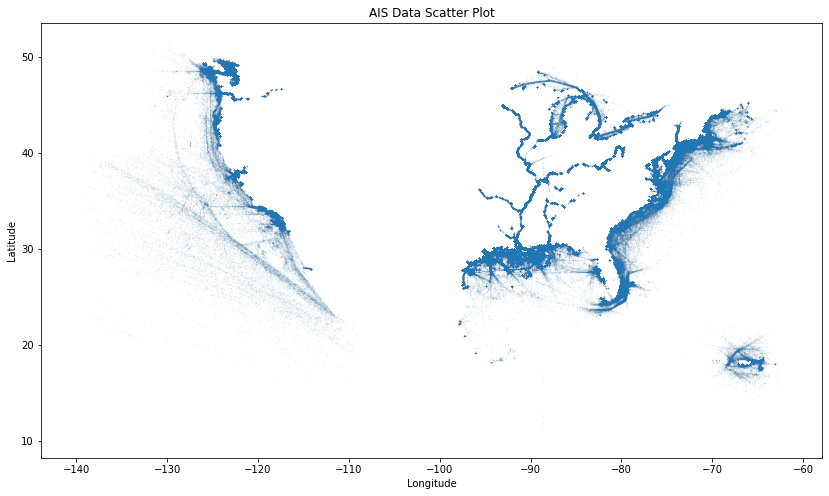

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Read the table into a DataFrame
df = spark.read.table("ais.june")

# Specify the bounding box
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Filter the data to only include points within the bounding box
df_filtered = df.filter((df["LAT"] >= min_lat) & (df["LAT"] <= max_lat) & \
                        (df["LON"] >= min_lon) & (df["LON"] <= max_lon))

# Sample the data (adjust the fraction to change the size of the sample)
df_sampled = df_filtered.sample(fraction=0.01, seed=42)

# Convert the Spark DataFrame to a pandas DataFrame
df_pandas = df_sampled.toPandas()

# Set the figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Create a scatter plot using matplotlib
ax.scatter(df_pandas["LON"], df_pandas["LAT"], s=0.01, alpha=0.2)

# Set the plot title and axis labels
ax.set_title("AIS Data Scatter Plot")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


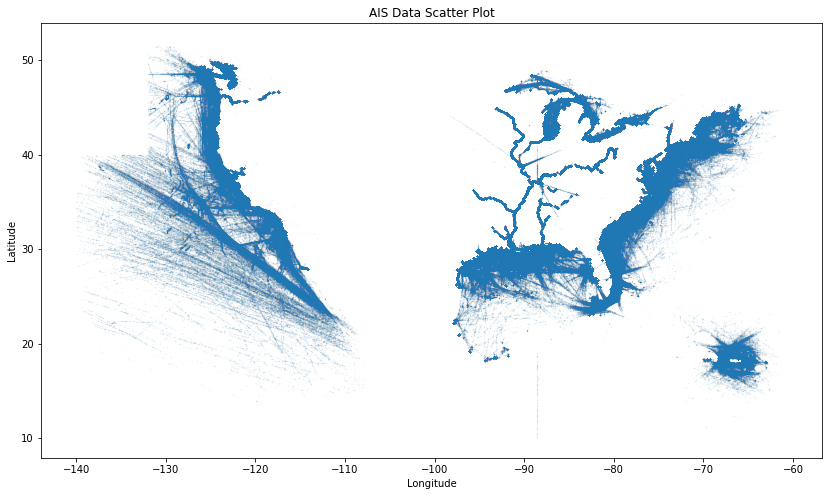

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Read the table into a DataFrame
df = spark.read.table("ais.june")

# Specify the bounding box
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Filter the data to only include points within the bounding box
df_filtered = df.filter((df["LAT"] >= min_lat) & (df["LAT"] <= max_lat) & \
                        (df["LON"] >= min_lon) & (df["LON"] <= max_lon))

# Sample the data (adjust the fraction to change the size of the sample)
df_sampled = df_filtered.sample(fraction=0.1, seed=42)

# Convert the Spark DataFrame to a pandas DataFrame
df_pandas = df_sampled.toPandas()

# Set the figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Create a scatter plot using matplotlib
ax.scatter(df_pandas["LON"], df_pandas["LAT"], s=0.01, alpha=0.2)

# Set the plot title and axis labels
ax.set_title("AIS Data Scatter Plot")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()
